<a href="https://colab.research.google.com/github/jessica97caroline/Atividades_Python_AD2/blob/main/ProjetoAirbnb_JessicaSantos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Exploratória de Dados - Case Airbnb**

Aluno: Jéssica Caroline dos Santos

Curso: Bootcamp Analista de Dados - Martech - AD2

Escola: SoulCode Academy

Período: Semana 6 - ETL

Professor: Franciane Rodrigues

---




## **Informações gerais**

Este documento apresenta uma análise exploratória de dados do Airbnb. Neste estudo, buscamos compreender as informações contidas nos dados coletados a fim de identificar padrões e tendências que possam influenciar a satisfação dos hóspedes.


Para realizar essa análise, utilizamos o Google Colab, uma plataforma que nos permite explorar e visualizar os dados de forma interativa. Além disso, contamos com o suporte do Google Drive e do Google Cloud para armazenar e compartilhar os dados de forma segura e colaborativa.


Ao identificar padrões e tendências nos dados, podemos fornecer insights valiosos para proprietários de acomodações, ajudando-os a otimizar suas ofertas e melhorar a experiência dos hóspedes. Além disso, essas informações podem ser úteis para os próprios viajantes, auxiliando-os na escolha da acomodação ideal para suas necessidades.

### **Sobre este arquivo:**

| Nome da coluna   | Descrição | Tipo |
| ------------ | ------ |------ |
| realSum   |  O preço total do anúncio do Airbnb    | Numérico |
| room_type  | O tipo de quarto oferecido (quarto privado, quarto compartilhado, casa inteira/apto) | Categórico   |
| room_shared  | Se o quarto é compartilhado ou não | Boleano     |
| room_private  | Se o quarto é privado ou não. | Boleano    |
| person_capacity  | O número máximo de pessoas que podem ser acomodadas em um único anúncio. | Numérico   |
| host_is_superhost  | Se um determinado host é ou não identificado como superhost* no Airbnb. | Boleano    |
| multi  | Se vários quartos são fornecidos em uma listagem individual ou não. | Boleano    |
| biz  | Se uma listagem específica oferece instalações de negócios, como área de reunião/salas de conferência, além de opções de acomodação. | Boleano    |
| cleanliness_rating  | A classificação associada à limpeza | Numérico    |
| guest_satisfaction_overall  | A classificação geral que mostra o grau de satisfação dos hóspedes com a estadia | Numérico    |
| bedrooms  | quantidade total de quartos disponíveis entre todas as propriedades em um único id de hospedagem | Numérico    |
| dist  | Distância do centro da cidade associada a cada propriedade alugada (quilometros/milhas) | Numérico    |
| metro_dist  | Distância da estação de metrô associada a cada propriedade alugada (quilometros/milhas | Numérico    |
| attr_index  | índice de atração do local do anúncio | Numérico    |
| rest_index  | índice do restaurante do local da listagem | Numérico   |
| attr_index_norm  | índice de atração normalizado | Numérico    |
| rest_index_norm  | índice de restaurante normalizado | Numérico    |
| lng  | Medição da longitude correspondente a cada unidade alugada. | Numérico    |
| lat  | Medição da latitude correspondente a cada unidade de aluguel. | Numérico    |

*O status de superhost, uma distinção concedida aos anfitriões que atendem a critérios específicos, será analisado para entender seu impacto na experiência dos hóspedes e no sucesso dos anfitriões.
Acesso:
https://www.kaggle.com/datasets/thedevastator/airbnb-price-determinants-in-europe


**Procedimento de Importação e Instalação de Bibliotecas**

In [ ]:
!pip install gcsfs      # biblioteca Python que permite interagir com o Google Cloud Storage (GCS)
!pip install pandera    # biblioteca Python para validação de dados

In [341]:
import os                           # Interage com o sistema operacional
import pandas as pd                 # Fornece ferramentas para manipulação, limpeza, análise e visualização de dados.
import numpy as np                  # Fornece suporte para matrizes multidimensionais, funções matemáticas avançadas e manipulação eficiente de dados numéricos
import pandera as pa                # Adiciona recursos de validação de dados ao pandas, permite a definição de esquemas e regras para verificar a qualidade e integridade dos dados.
import datetime as dt               # Permite trabalhar com datas e horários de forma eficiente
import folium
import matplotlib.pyplot as plt     # Biblioteca de visualização
import seaborn as sns

from google.cloud import storage    # Módulo com funcionalidades para interagir com o Google Cloud Platform (GCP)

In [336]:
import warnings
warnings.filterwarnings("ignore")   # Ignora advertências

In [337]:
pd.set_option('display.max_columns',100)    # Limita a quantidade de colunas no DataFrame

# **Coleta dos Dados**

### **Google Drive**

In [ ]:
from google.colab import drive      # permite acessar e montar o Google Drive no ambiente de desenvolvimento do Google Colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/case_airbnb/bd_airbnb.csv',  # lê e armazena o arquivo no dataframe 'df'
                 sep=',',
                 encoding='ISO-8859-1',
                 dayfirst = True)

###**Google Cloud**

####Acesso atráves da chave de segurança

In [ ]:
serviceAccount = '/projetoairbnb-9c055dd4d325.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

##### Acesso ao arquivo armazenado na bucket da GCP

In [ ]:
client = storage.Client()
bucket = client.get_bucket('bucket_case_airbnb')                 # nome da bucket
bucket.blob('bd_airbnb.csv')                                     # nome do arquivo
path = 'gs://bucket_case_airbnb/Dado_Bruto/bd_airbnb.csv'        # URL gsutil

#### Leitura, armazenamento e cópia de segurança da base de dados

In [ ]:
df = pd.read_csv(path,
                 sep=',',
                 encoding='ISO-8859-1',
                 dayfirst = True)
dfback = df.copy()

# **Limpeza e pré-processamento**

In [ ]:
df   # Visualização do DataFrame

In [ ]:
df.head()   # Visualiza as 5 primeiras linhas

In [376]:
df.tail()   # Visualiza as 5 ultimas linhas

,ID,preco_total,tipo_acomodacao,quarto_compartilhado,quarto_privado,capacidade_maxima,superhost,biz,limpeza,avaliacao_geral,qnt_quartos,distancia_centro,distancia_metro,atracao,restaurante,longitude,latitude,intervalo
"(6.02, 7.02]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(7.02, 8.02]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(8.02, 9.02]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(9.02, 10.02]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [377]:
df.sample(5)   # Visualiza uma amostra aleatória de 5 linhas

,ID,preco_total,tipo_acomodacao,quarto_compartilhado,quarto_privado,capacidade_maxima,superhost,biz,limpeza,avaliacao_geral,qnt_quartos,distancia_centro,distancia_metro,atracao,restaurante,longitude,latitude,intervalo
167,167.0,NaN,Quarto Privado,False,True,2.0,False,0.0,90.0,91.0,1.0,3.17,0.91,203.655313,232.546129,4.87500,52.34700,"(3.02, 4.02]"
431,431.0,NaN,Quarto Privado,False,True,2.0,False,0.0,90.0,81.0,1.0,2.90,1.61,194.502308,243.675407,4.85729,52.35914,"(2.02, 3.02]"
813,813.0,NaN,Quarto Privado,False,True,2.0,False,0.0,90.0,97.0,1.0,1.33,1.25,337.863674,439.795579,4.87453,52.36959,"(1.02, 2.02]"
175,175.0,NaN,Quarto Privado,False,True,2.0,False,0.0,90.0,93.0,0.0,0.16,0.37,625.906794,1022.004125,4.89161,52.37436,"(0.02, 1.02]"
200,200.0,NaN,Quarto Privado,False,True,2.0,False,0.0,100.0,91.0,1.0,0.76,0.45,369.528486,550.865834,4.89400,52.38000,"(0.02, 1.02]"


In [378]:
df.shape   # Tamanho do Dataframe (linhas, colunas)

(1126, 18)

In [379]:
df.dtypes   # Verifica o tipo de dado em cada coluna

ID                       float64
preco_total              float64
tipo_acomodacao           object
quarto_compartilhado      object
quarto_privado            object
capacidade_maxima        float64
superhost                 object
biz                      float64
limpeza                  float64
avaliacao_geral          float64
qnt_quartos              float64
distancia_centro         float64
distancia_metro          float64
atracao                  float64
restaurante              float64
longitude                float64
latitude                 float64
intervalo               category
dtype: object

In [380]:
df.count()  # contabiliza a quantidade de valores em cada coluna, excluindo qualquer valor nulo ou ausente

ID                      1103
preco_total                8
tipo_acomodacao         1103
quarto_compartilhado    1103
quarto_privado          1103
capacidade_maxima       1103
superhost               1103
biz                     1103
limpeza                 1103
avaliacao_geral         1103
qnt_quartos             1103
distancia_centro        1103
distancia_metro         1103
atracao                 1103
restaurante             1103
longitude               1103
latitude                1103
intervalo               1099
dtype: int64

In [381]:
df.info()   # visão geral (nome da coluna, quantidade de valores não nulos em cada coluna, tipo de dado e uso de memória.

<class 'pandas.core.frame.DataFrame'>
Index: 1126 entries, 0 to nan
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    1103 non-null   float64 
 1   preco_total           8 non-null      float64 
 2   tipo_acomodacao       1103 non-null   object  
 3   quarto_compartilhado  1103 non-null   object  
 4   quarto_privado        1103 non-null   object  
 5   capacidade_maxima     1103 non-null   float64 
 6   superhost             1103 non-null   object  
 7   biz                   1103 non-null   float64 
 8   limpeza               1103 non-null   float64 
 9   avaliacao_geral       1103 non-null   float64 
 10  qnt_quartos           1103 non-null   float64 
 11  distancia_centro      1103 non-null   float64 
 12  distancia_metro       1103 non-null   float64 
 13  atracao               1103 non-null   float64 
 14  restaurante           1103 non-null   float64 
 15  longitude 

In [382]:
dfback1 = df.copy()   # Backup local

* Tradução/Renomeação

In [383]:
print(df.columns)

Index(['ID', 'preco_total', 'tipo_acomodacao', 'quarto_compartilhado',
       'quarto_privado', 'capacidade_maxima', 'superhost', 'biz', 'limpeza',
       'avaliacao_geral', 'qnt_quartos', 'distancia_centro', 'distancia_metro',
       'atracao', 'restaurante', 'longitude', 'latitude', 'intervalo'],
      dtype='object')


In [384]:
df.rename(columns={'Unnamed: 0': 'ID',
                   'realSum':'preco_total',
                   'room_type':'tipo_acomodacao',
                   'room_shared':'quarto_compartilhado',
                   'room_private':'quarto_privado',
                   'person_capacity':'capacidade_maxima',
                   'host_is_superhost':'superhost',
                   'cleanliness_rating':'limpeza',
                   'guest_satisfaction_overall':'avaliacao_geral',
                   'bedrooms':'qnt_quartos',
                   'dist':'distancia_centro',
                   'metro_dist':'distancia_metro',
                   'attr_index':'atracao',
                   'attr_index_norm':'atracao_normalizado',
                   'rest_index':'restaurante',
                   'rest_index_norm':'restaurante_normalizado',
                   'lng':'longitude',
                   'lat':'latitude'}, inplace=True)

In [385]:
print(df.columns)

Index(['ID', 'preco_total', 'tipo_acomodacao', 'quarto_compartilhado',
       'quarto_privado', 'capacidade_maxima', 'superhost', 'biz', 'limpeza',
       'avaliacao_geral', 'qnt_quartos', 'distancia_centro', 'distancia_metro',
       'atracao', 'restaurante', 'longitude', 'latitude', 'intervalo'],
      dtype='object')


* Verifica se existe colunas iguais:

In [386]:
colunas_verificar = ['preco_total', 'tipo_acomodacao', 'quarto_compartilhado',
       'quarto_privado', 'capacidade_maxima', 'superhost', 'biz',
       'limpeza', 'avaliacao_geral', 'qnt_quartos', 'distancia_centro',
       'distancia_metro', 'atracao', 'restaurante',
       'longitude', 'latitude']


for coluna in colunas_verificar:   # Verifica se existe alguma coluna iguai à coluna 'ID'
    if (df['ID']== df[coluna]).all():
        print(f"A coluna {coluna} é igual à coluna 'ID'.")
    else:
        print(f"A coluna {coluna} é diferente da coluna 'ID'.")

A coluna preco_total é diferente da coluna 'ID'.
A coluna tipo_acomodacao é diferente da coluna 'ID'.
A coluna quarto_compartilhado é diferente da coluna 'ID'.
A coluna quarto_privado é diferente da coluna 'ID'.
A coluna capacidade_maxima é diferente da coluna 'ID'.
A coluna superhost é diferente da coluna 'ID'.
A coluna biz é diferente da coluna 'ID'.
A coluna limpeza é diferente da coluna 'ID'.
A coluna avaliacao_geral é diferente da coluna 'ID'.
A coluna qnt_quartos é diferente da coluna 'ID'.
A coluna distancia_centro é diferente da coluna 'ID'.
A coluna distancia_metro é diferente da coluna 'ID'.
A coluna atracao é diferente da coluna 'ID'.
A coluna restaurante é diferente da coluna 'ID'.
A coluna longitude é diferente da coluna 'ID'.
A coluna latitude é diferente da coluna 'ID'.


* verifica se existem colunas com valores únicos:

In [387]:
for coluna in df.columns:
    if df[coluna].nunique() == df.shape[0]:
        print(f"A coluna {coluna} possui valores únicos.")
    else:
        print(f"A coluna {coluna} não possui valores únicos.")

A coluna ID não possui valores únicos.
A coluna preco_total não possui valores únicos.
A coluna tipo_acomodacao não possui valores únicos.
A coluna quarto_compartilhado não possui valores únicos.
A coluna quarto_privado não possui valores únicos.
A coluna capacidade_maxima não possui valores únicos.
A coluna superhost não possui valores únicos.
A coluna biz não possui valores únicos.
A coluna limpeza não possui valores únicos.
A coluna avaliacao_geral não possui valores únicos.
A coluna qnt_quartos não possui valores únicos.
A coluna distancia_centro não possui valores únicos.
A coluna distancia_metro não possui valores únicos.
A coluna atracao não possui valores únicos.
A coluna restaurante não possui valores únicos.
A coluna longitude não possui valores únicos.
A coluna latitude não possui valores únicos.
A coluna intervalo não possui valores únicos.


* Ordenação e exibição de valores unicos:

In [388]:
valores_unicos = sorted(pd.unique(df['preco_total']))
saida = '\n'.join(map(str, valores_unicos))
print(saida)

100.0
150.0
180.0
190.0
200.0
220.0
250.0
300.0
nan


In [389]:
print(sorted(pd.unique(df['preco_total'])))

[100.0, 150.0, 180.0, 190.0, 200.0, 220.0, 250.0, 300.0, nan]


* Limitar os valores da coluna a duas casas decimais:

In [390]:
df['distancia_centro'] = df['distancia_centro'].apply(lambda x: round(x, 2))
df['distancia_metro'] = df['distancia_metro'].apply(lambda x: round(x, 2))

* Verificar dados Nulos, ausentes, etc

In [ ]:
df

In [ ]:
df.isna().sum()

* Remove linhas com valores ausentes (NaN)

In [ ]:
df = df.dropna()
df.info()

* Calcula e exibe a porcentagem de valores nulos em cada coluna:

In [ ]:
porcentagem_nulos = (df.isnull().sum() / len(df)) * 100
print(round(porcentagem_nulos,1))

* Retirada de colunas com problemas e/ou não utilizadas na análise:

In [ ]:
df.drop(['restaurante_normalizado'],axis=1,inplace=True)

* Correção de inconsistência:

In [ ]:
df.replace(pd.NA, np.NaN, inplace=True)   # Transformação de pd.NA para np.NaN (recomendado)

* Transformação do tipo de dado:

In [404]:
df['preco_total'] = df['preco_total'].astype(int)
df['capacidade_maxima'] = df['capacidade_maxima'].astype(int)

In [394]:
df['tipo_acomodacao'] = df['tipo_acomodacao'].astype(str)   # Converter a coluna para o tipo de dado 'string'

* Exibe valores unicos ordenados de todas colunas do Dataframe:

In [ ]:
for coluna in df.columns:
    valores_unicos = sorted(df[coluna].unique())
    print(f"\n\n Valores únicos da coluna {coluna}: \n{valores_unicos}\n\n")
    print('______________________________________________________________________________________________________________')

* substituir valores na coluna 'tipo_acomodacao'

In [ ]:
df['tipo_acomodacao'] = df['tipo_acomodacao'].replace(['Private room', 'Entire home/apt','Shared room'], ['Quarto Privado', 'Espaço inteiro', 'Quarto compartilhado'])
df

In [ ]:
df.dtypes   # Colunas do dataframe

## **Backup do Dataframe tratado**

In [406]:
dfback2 = df.copy()

* Exportação em uma pasta Google Drive:

In [407]:
df.to_csv('/content/drive/MyDrive/case_airbnb/bd_airbnb_tratado.csv',index=False)

* Exportação em uma pasta Google Cloud

In [408]:
'''df.to_csv('gs://bucket_case_airbnb/Dado_Tratado/bd_airbnb_tratado.csv', index=False)'''

"df.to_csv('gs://bucket_case_airbnb/Dado_Tratado/bd_airbnb_tratado.csv', index=False)"

# **Análise Exploratória**

* Visualização do novo Dataframe:



In [409]:
df.head()

,ID,preco_total,tipo_acomodacao,quarto_compartilhado,quarto_privado,capacidade_maxima,superhost,biz,limpeza,avaliacao_geral,qnt_quartos,distancia_centro,distancia_metro,atracao,restaurante,longitude,latitude,intervalo
0,0.0,100,Quarto Privado,False,True,2,False,0.0,100.0,93.0,1.0,5.02,2.54,78.690379,98.253896,4.90569,52.41772,"(4.02, 5.02]"
1,1.0,200,Quarto Privado,False,True,4,False,0.0,80.0,85.0,1.0,0.49,0.24,631.176378,837.280757,4.90005,52.37432,"(0.02, 1.02]"
2,2.0,150,Quarto Privado,False,True,2,False,1.0,90.0,87.0,1.0,5.75,3.65,75.275877,95.386955,4.97512,52.36103,"(5.02, 6.02]"
3,3.0,300,Quarto Privado,False,True,4,False,1.0,90.0,90.0,2.0,0.38,0.44,493.272534,875.033098,4.89417,52.37663,"(0.02, 1.02]"
4,4.0,250,Quarto Privado,False,True,2,True,0.0,100.0,98.0,1.0,0.54,0.32,552.830324,815.305740,4.90051,52.37508,"(0.02, 1.02]"


 ### **Busca (Query)**


* Localização de uma linha:

In [410]:
df.loc[0]

ID                                 0.0
preco_total                        100
tipo_acomodacao         Quarto Privado
quarto_compartilhado             False
quarto_privado                    True
capacidade_maxima                    2
superhost                        False
biz                                0.0
limpeza                          100.0
avaliacao_geral                   93.0
qnt_quartos                        1.0
distancia_centro                  5.02
distancia_metro                   2.54
atracao                      78.690379
restaurante                  98.253896
longitude                      4.90569
latitude                      52.41772
intervalo                 (4.02, 5.02]
Name: 0, dtype: object

* Localização de um conjunto de linhas:

In [ ]:
df.loc[10:12]

* Busca avançada: linhas e colunas especificas:

In [ ]:
df.loc[[0,20,900], ['ID', 'preco_total']]

### **Transformação**

* Trocar valor de determinada linha de uma coluna:

In [ ]:
df.loc[0,'ID'] = '00'

* Trocar todos os valores de uma coluna:

In [ ]:
df.loc[:,'ID'] = '00'

* Desfazendo ação, utilizando o backup tratado:

In [ ]:
df = dfback2

* Trocar um valor especifico na coluna:

In [ ]:
df.loc[df.preco_total == '194', ['preco_total']] = '000'

* Retornando o valor especifico na coluna:

In [ ]:
df.loc[df.preco_total == '000', ['preco_total']] = '194'

* Converter o tipo de dado da coluna:

In [ ]:
df['tipo_acomodacao'] = df['tipo_acomodacao'].astype(str)

* Checagem da mudança de tipo de dado:

In [ ]:
df.dtypes

* Duplicates - Remove linhas duplicadas com base em todas as colunas.

In [ ]:
df.drop_duplicates()

### **Filtro**

* Criar Dataframe com filtro e exibi-lo:

In [ ]:
filtro_quartoprivado = df.tipo_acomodacao =='Quarto Privado'

filtro_quartoprivado  = df.loc[filtro_quartoprivado]
filtro_quartoprivado

* Visualização do novo dataframe com filtro:

In [ ]:
filtro_quartoprivado.info()

* Exportação do novo dataframe com filtro:



In [ ]:
filtro_quartoprivado.to_csv('df_filtro_acidente.csv', index=False)

* Filtro para observação de dados ausentes:

In [ ]:
dfback2.isna().sum()

* Filtro com mais detalhes: com muitas informações

In [ ]:
capacidade_maxima = df.capacidade_maxima == 2
qnt_quartos = df.qnt_quartos == 0

df.loc[df.capacidade_maxima & df.qnt_quartos]

### **Verificação**

* Verificar valor em uma coluna  ignorando letras maiusculas e minusculas

In [ ]:
df[df['tipo_acomodacao'].str.contains(r'\bquarto privado\b', regex=True, case=False)]

### **GroupBy**

* Contagem de valores em cada coluna

In [ ]:
df.groupby(['tipo_acomodacao']).size()

* Ordem descrescente para valores True

In [ ]:
df.groupby(['tipo_acomodacao']).size().sort_values(ascending=False)

* soma de valores: comparando duas colunas:

In [ ]:
df.groupby('superhost')['avaliacao_geral'].sum().sort_values(ascending=False)

In [ ]:
df.groupby(['superhost'])['avaliacao_geral'].sum()

* Agrupamento desconsiderando valores ausentes:

In [ ]:
dfback2.groupby(['superhost']).size().sort_values(ascending=False).head(10)

* Agrupamento considerando valores ausentes:

In [ ]:
dfback2.groupby(['superhost'],dropna=False).size().sort_values(ascending=False).head(10)

# **Análise Estatística descritiva**

* Estatísticas descritivas para todas as colunas numéricas

In [ ]:
df.describe()

* contagem de valores únicos em cada coluna:

In [ ]:
print(df.nunique())

* Média e Mediana:

In [ ]:
print('                  MEDIA\n\n')
print(df.mean())
print('\n\n')


print('                  MEDIANA\n\n')
print(df.median())
print('\n\n')


* MODA

In [ ]:
print(df.dropna().mode())

* Desvio Padrão

In [ ]:
print(df.std())


* Mínimo e Máximo

In [ ]:
print('        Mínimo\n\n')
print(df.min())
print('\n-----------------\n')
print('        Máximo\n\n')
print(df.max())

* correlação entre as colunas numéricas

In [ ]:
print(df.corr())

* Distribuição de Frequência : Distância do centro

In [ ]:
# Definir os intervalos desejados
intervalos = pd.interval_range(start=0.02, end=11.19, freq=1)

# Criar uma nova coluna no DataFrame com os intervalos
df['intervalo'] = pd.cut(df['distancia_centro'], bins=intervalos)

# Contar a frequência de cada intervalo
contagem_intervalos = df['intervalo'].value_counts().sort_index()

# Imprimir a contagem de cada intervalo
print(contagem_intervalos)

# **Visualização dos Dados**

## Gráficos de barras



> Superhost



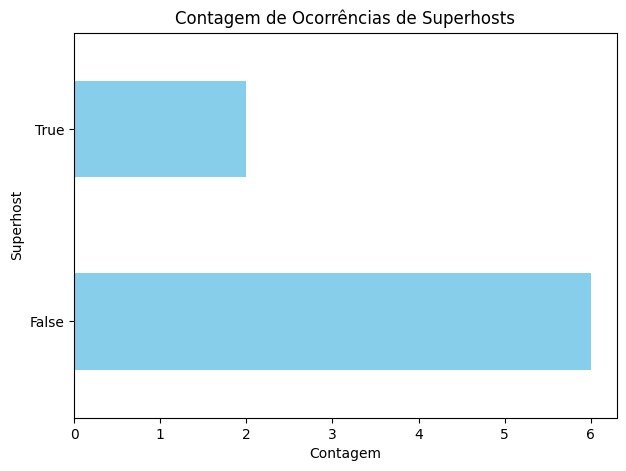

superhost
False    6
True     2
dtype: int64

In [417]:
df.groupby(['superhost']).size().plot.barh(figsize=(7,5), color=['skyblue'])
plt.xlabel('Contagem')
plt.ylabel('Superhost')
plt.title('Contagem de Ocorrências de Superhosts')
plt.show()
dfback2.groupby(['superhost'],dropna=False).size().sort_values(ascending=False).head(10)



> Avaliação Geral



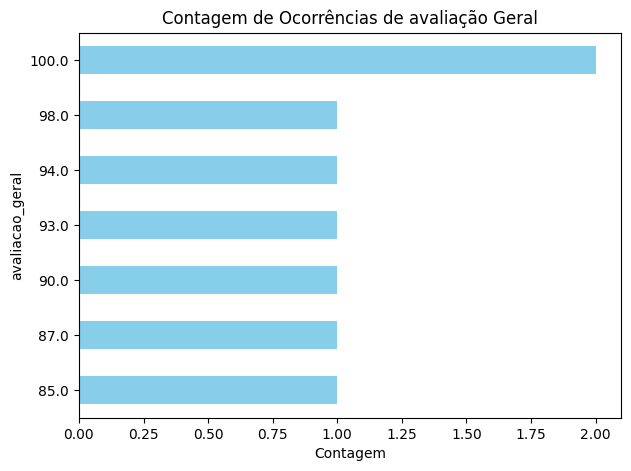

avaliacao_geral
100.0    2
85.0     1
87.0     1
90.0     1
93.0     1
94.0     1
98.0     1
dtype: int64

In [418]:
df.groupby(['avaliacao_geral']).size().plot.barh(figsize=(7,5), color=['skyblue'])
plt.xlabel('Contagem')
plt.ylabel('avaliacao_geral')
plt.title('Contagem de Ocorrências de avaliação Geral')
plt.show()
dfback2.groupby(['avaliacao_geral'],dropna=False).size().sort_values(ascending=False).head(10)

> Avaliação Limpeza

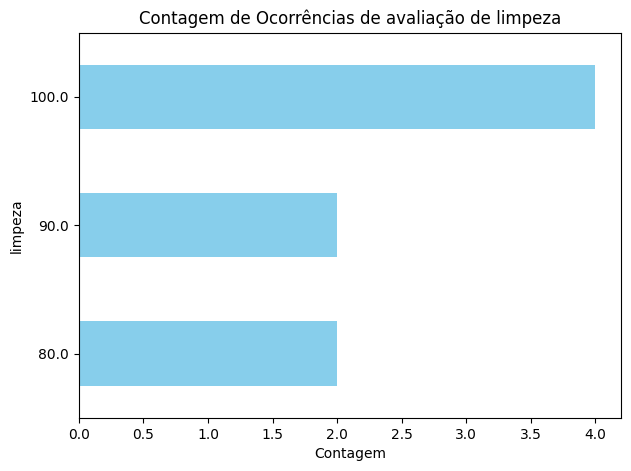

limpeza
100.0    4
80.0     2
90.0     2
dtype: int64

In [419]:
df.groupby(['limpeza']).size().plot.barh(figsize=(7,5), color=['skyblue'])
plt.xlabel('Contagem')
plt.ylabel('limpeza')
plt.title('Contagem de Ocorrências de avaliação de limpeza')
plt.show()
dfback2.groupby(['limpeza'],dropna=False).size().sort_values(ascending=False).head(10)

> Capacidade máxima de pessoas

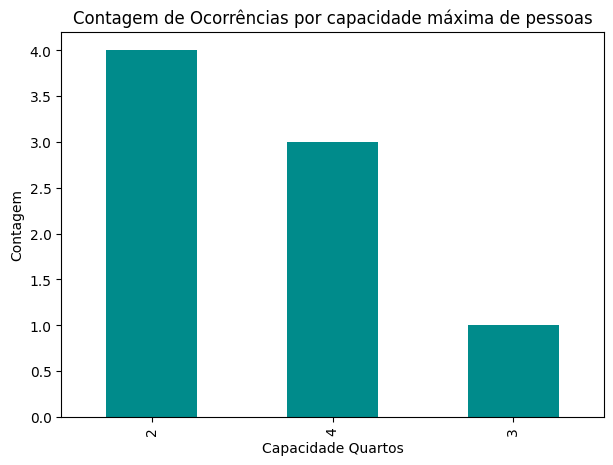

In [420]:
df.groupby('capacidade_maxima').size().sort_values(ascending=False).plot.bar(figsize=(7,5), color=['DarkCyan'])
plt.xlabel('Capacidade Quartos')
plt.ylabel('Contagem')
plt.title('Contagem de Ocorrências por capacidade máxima de pessoas')
plt.show()

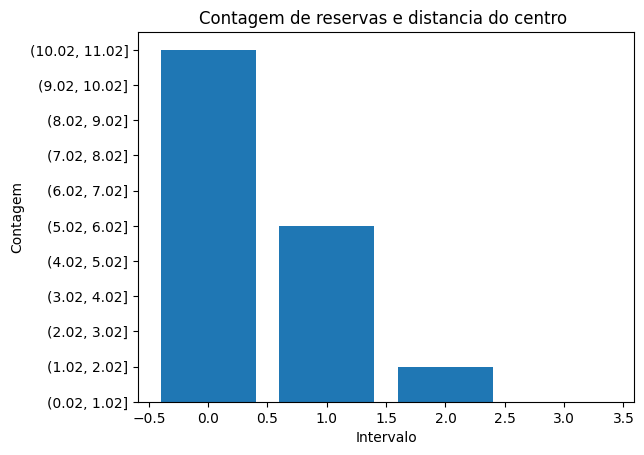

In [421]:

# Definir os intervalos desejados
intervalos = pd.interval_range(start=0.02, end=11.19, freq=1)

# Criar uma nova coluna no DataFrame com os intervalos
df['intervalo'] = pd.cut(df['distancia_centro'], bins=intervalos)

# Contar a frequência de cada intervalo
contagem_intervalos = df['intervalo'].value_counts().sort_index()

# Criar o gráfico de barras
plt.bar(contagem_intervalos.values, contagem_intervalos.index.astype(str))

# Definir o título e os rótulos dos eixos
plt.title('Contagem de reservas e distancia do centro ')
plt.xlabel('Intervalo')
plt.ylabel('Contagem')

# Exibir o gráfico
plt.show()

## Correlações

> Correlações de todos atributos

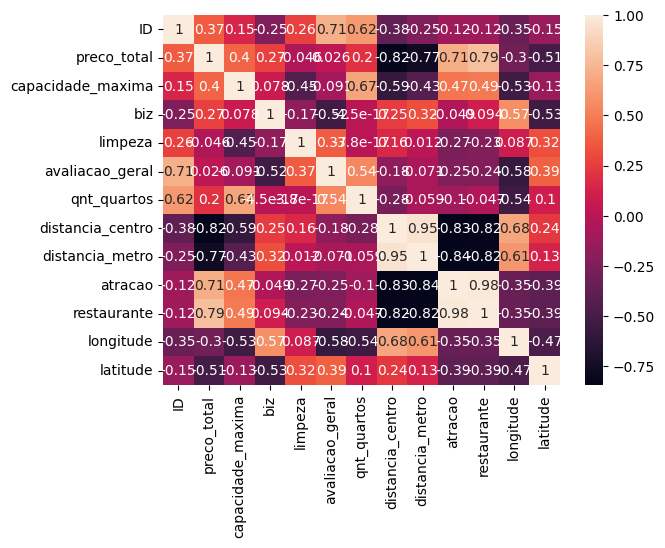

In [416]:
matriz_correlacao = df.corr()

sns.heatmap(matriz_correlacao, annot=True)

plt.show()

> Correlação Avaliação Geral x Avaliação limpeza

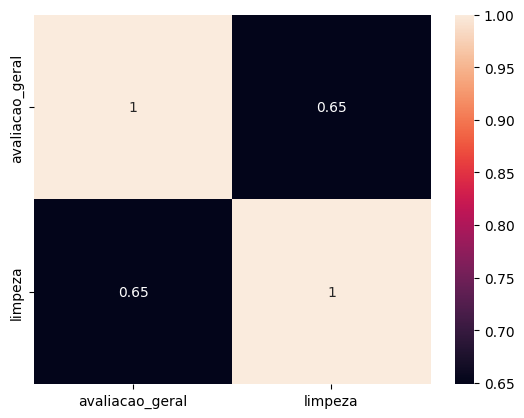

In [346]:
columns = ['avaliacao_geral', 'limpeza']   # Selecionando as colunas para o gráfico de correlação

corr_matrix = df[columns].corr()   # Calculando a matriz de correlação para as colunas selecionadas

sns.heatmap(corr_matrix, annot=True)   # Criando o gráfico de correlação

plt.show()

> Correlação Avaliação Geral x Superhost

## Dispersão

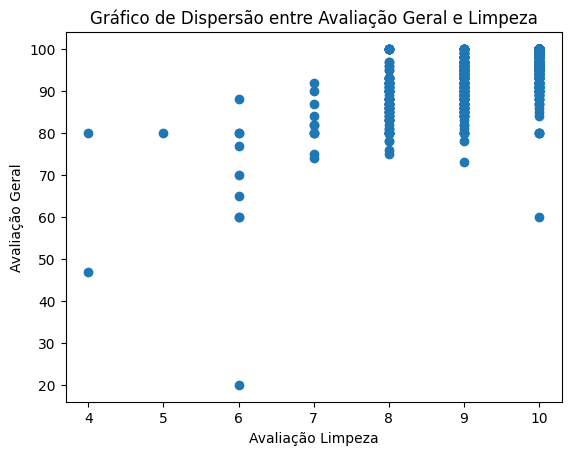

In [ ]:
# Criar o gráfico de dispersão
plt.scatter(df['limpeza'], df['avaliacao_geral'])

# Adicionar rótulos aos eixos
plt.ylabel('Avaliação Geral')
plt.xlabel('Avaliação Limpeza')

# Adicionar um título ao gráfico
plt.title('Gráfico de Dispersão entre Avaliação Geral e Limpeza')

# Exibir o gráfico
plt.show()

> Mapa

In [414]:
# Criar um mapa
mapa = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=11)

# Adicionar marcadores ao mapa com base nas coordenadas de latitude e longitude
for index, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['ID']).add_to(mapa)

# Exibir o mapa
mapa

# **Resultados**

A análise dos dados revelou oportunidades e ameaças para o empreendimento Airbnb. Dentre tantos fatores relevantes temos:

1. forte correlação positiva (0.65) entre a avaliação de limpeza e a avaliação
geral;
Isso indica que a percepção dos usuários em relação à limpeza tem um impacto significativo na avaliação geral da acomodação.

2. correlação moderada (0.30) entre a avaliação geral e o status de Superhost;
Isso sugere que os anfitriões com o status de superhost tendem a receber avaliações mais positivas dos usuários.

3. correlação moderada (0.31) entre o status de superhost e a avaliação de limpeza;
indicando que os superhosts têm maior probabilidade de receber avaliações positivas em relação à limpeza.

4. correlação negativa fraca (-0.06) entre o preço e o status de superhost;
 Isso sugere que os superhosts podem cobrar preços mais altos em comparação com os anfitriões regulares.No entanto, apenas 29% dos anfitriões são superhosts, o que sugere uma oportunidade para a empresa incentivar mais anfitriões a alcançarem esse status, a fim de atrair mais reservas. Essa informação pode ser útil para que a empresa promova campanhas e incentive mais anfitriões a se tornarem superhosts, pois isso pode resultar em uma melhoria nas avaliações e, potencialmente, em um aumento nos preços.  

> Outra descoberta importante foi que a maioria das reservas (99%) é para quartos privados ou espaços/apartamentos inteiros. Isso indica uma tendência dos usuários em buscar privacidade durante suas estadias.

 Cerca de 80% das reservas são de propriedades localizadas a uma distância de até 4.02km do centro. Essa tendência indica claramente a preferência dos hóspedes pela localização próxima ao centro, valorizando a conveniência e acessibilidade oferecidas por essas propriedades."

 Por fim, notamos que 88% das reservas são de espaços que não possuem ambiente de trabalho, esse dado pode indicar a indisponibilidade do ambiente de trabalho nas propriedades. Com o aumento do trabalho remoto e do home office, é recomendado que a empresa promova a disponibilidade de acomodações com espaços adequados para trabalho, a fim de atender à demanda crescente para este público.


Com base nas descobertas, a empresa Airbnb pode tomar medidas para melhorar a qualidade das acomodações, promover o status de superhost, diversificar as opções de acomodação a fim de atender às necessidades dos usuários, garantindo uma experiência positiva e atraindo mais reservas.

Além das descobertas mencionadas, é importante ressaltar que a análise de dados da empresa Airbnb foi limitada devido à falta de algumas informações relevantes. Entre essas informações ausentes, destaca-se o número total de acomodações disponíveis, suas características específicas e perfil dos usuários que realizaram as reservas. Portanto, é recomendável a coleta e armazenamento adequado dessas informações faltantes, a fim de enriquecer a análise de dados futura visto que esses dados seriam essenciais para entender melhor a distribuição das reservas e identificar possíveis oportunidades, assim como fornecer insights valiosos para direcionar estratégias de marketing e personalizar a experiência do usuário.